# **Presented by: Ali Basit**
**Oasis InfoByte Task 3 Car Price Predicton Using Machine Learning**

In [1]:
!unzip /content/Task_DataSet.zip

Archive:  /content/Task_DataSet.zip
  inflating: car data.csv            


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np


In [3]:
df = pd.read_csv("/content/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
# Convert categorical variables into numerical formats using one-hot encoding
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
numeric_cols = ['Year', 'Present_Price', 'Driven_kms', 'Owner']


In [6]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Standardize numeric features
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical features
    ])

In [7]:
# Split the data into features and target
X = df.drop('Selling_Price', axis=1)  # Features
y = df['Selling_Price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

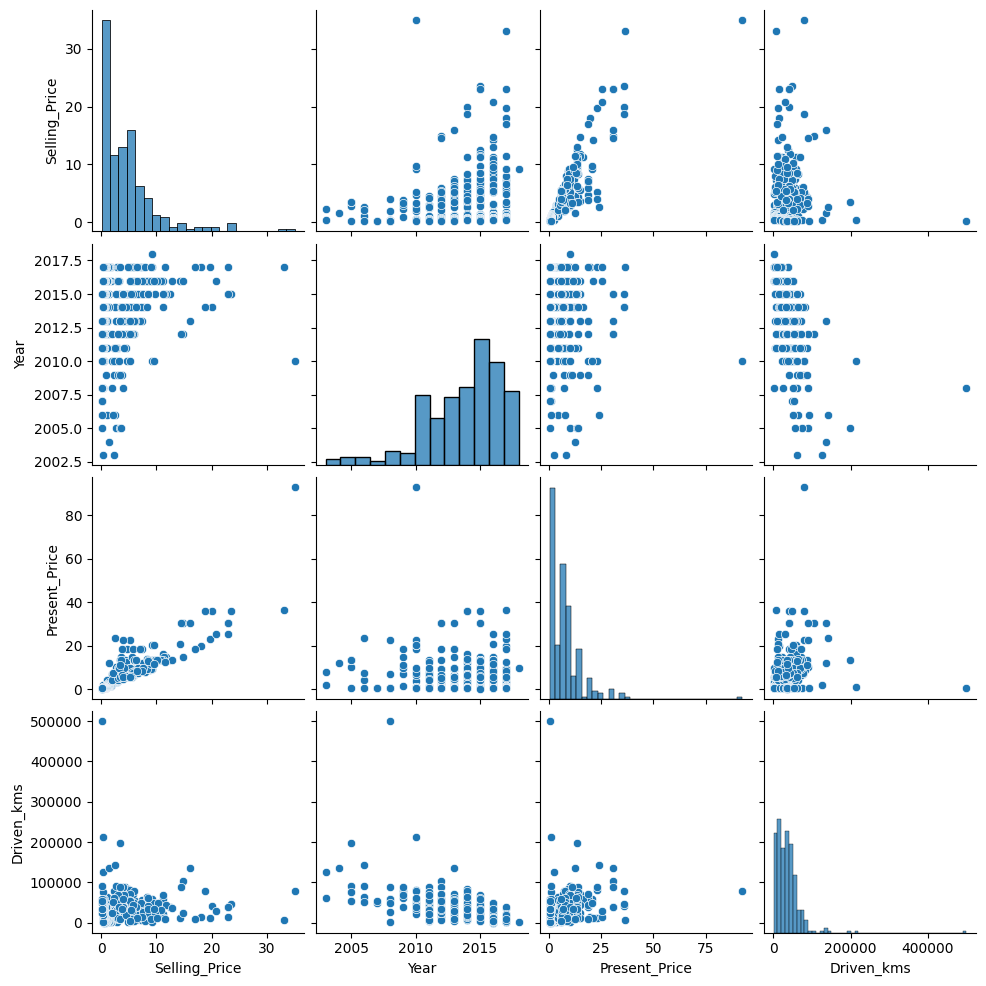

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pairplot to visualize relationships between numeric variables
sns.pairplot(df[['Selling_Price', 'Year', 'Present_Price', 'Driven_kms']], height=2.5)
plt.show()



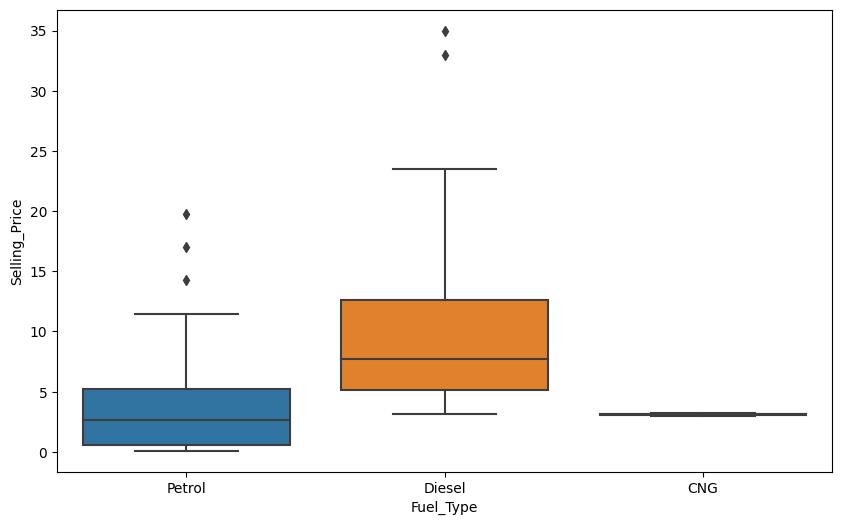

In [9]:
# Boxplot to identify outliers in numeric variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.show()

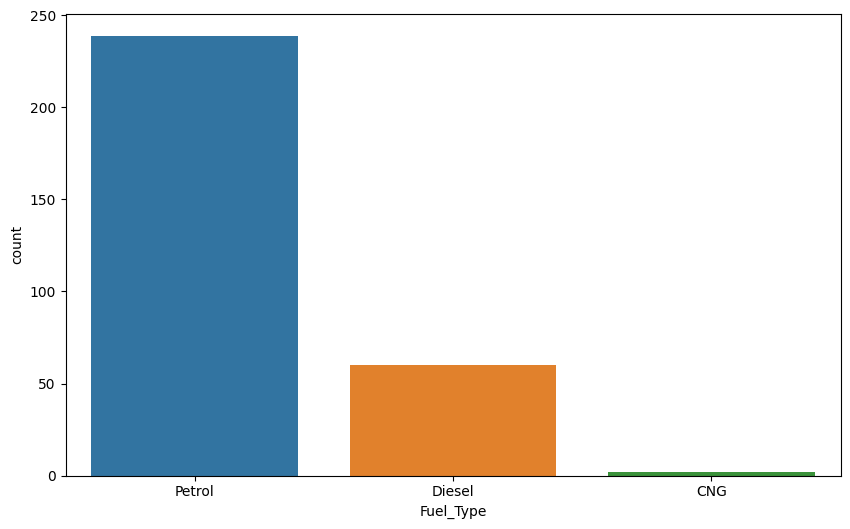

In [10]:
# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', data=df)
plt.show()


<ipython-input-11-20bb72c9c5da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


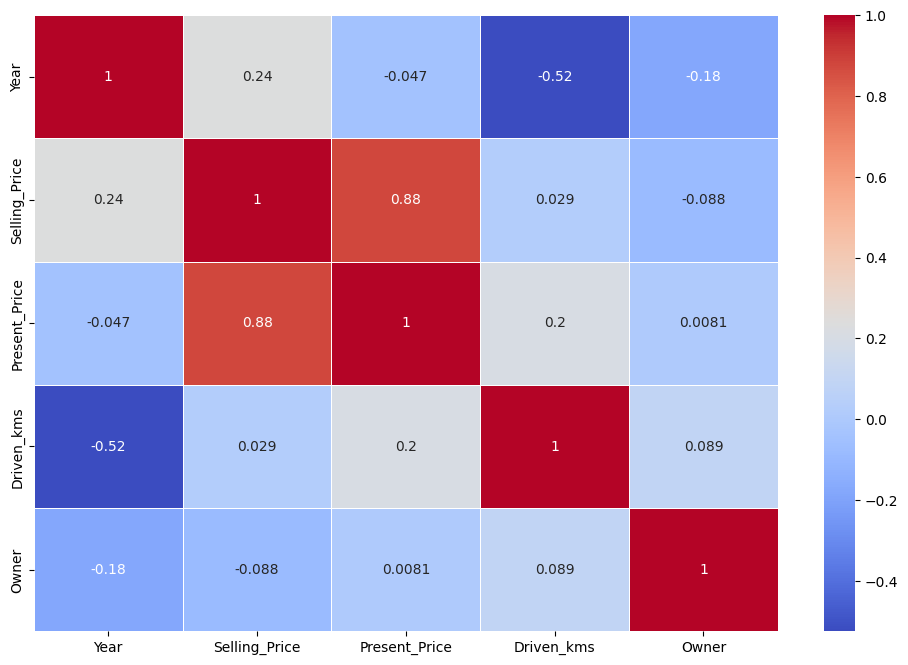

In [11]:
# Correlation matrix to identify relationships between all variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [28]:
# List of regression models to try
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Train and evaluate each model
for name, model in models:
    # Create a pipeline with preprocessing and the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print('\n' + '-'*40 + '\n')


Model: Linear Regression
Mean Squared Error: 2.2878274158199123
R-squared: 0.9006829015428394

----------------------------------------

Model: Decision Tree
Mean Squared Error: 1.0999836065573771
R-squared: 0.9522485046737803

----------------------------------------

Model: Random Forest
Mean Squared Error: 0.7710541483606554
R-squared: 0.9665276933745053

----------------------------------------

Model: Gradient Boosting
Mean Squared Error: 0.8998300228983546
R-squared: 0.9609373913604943

----------------------------------------



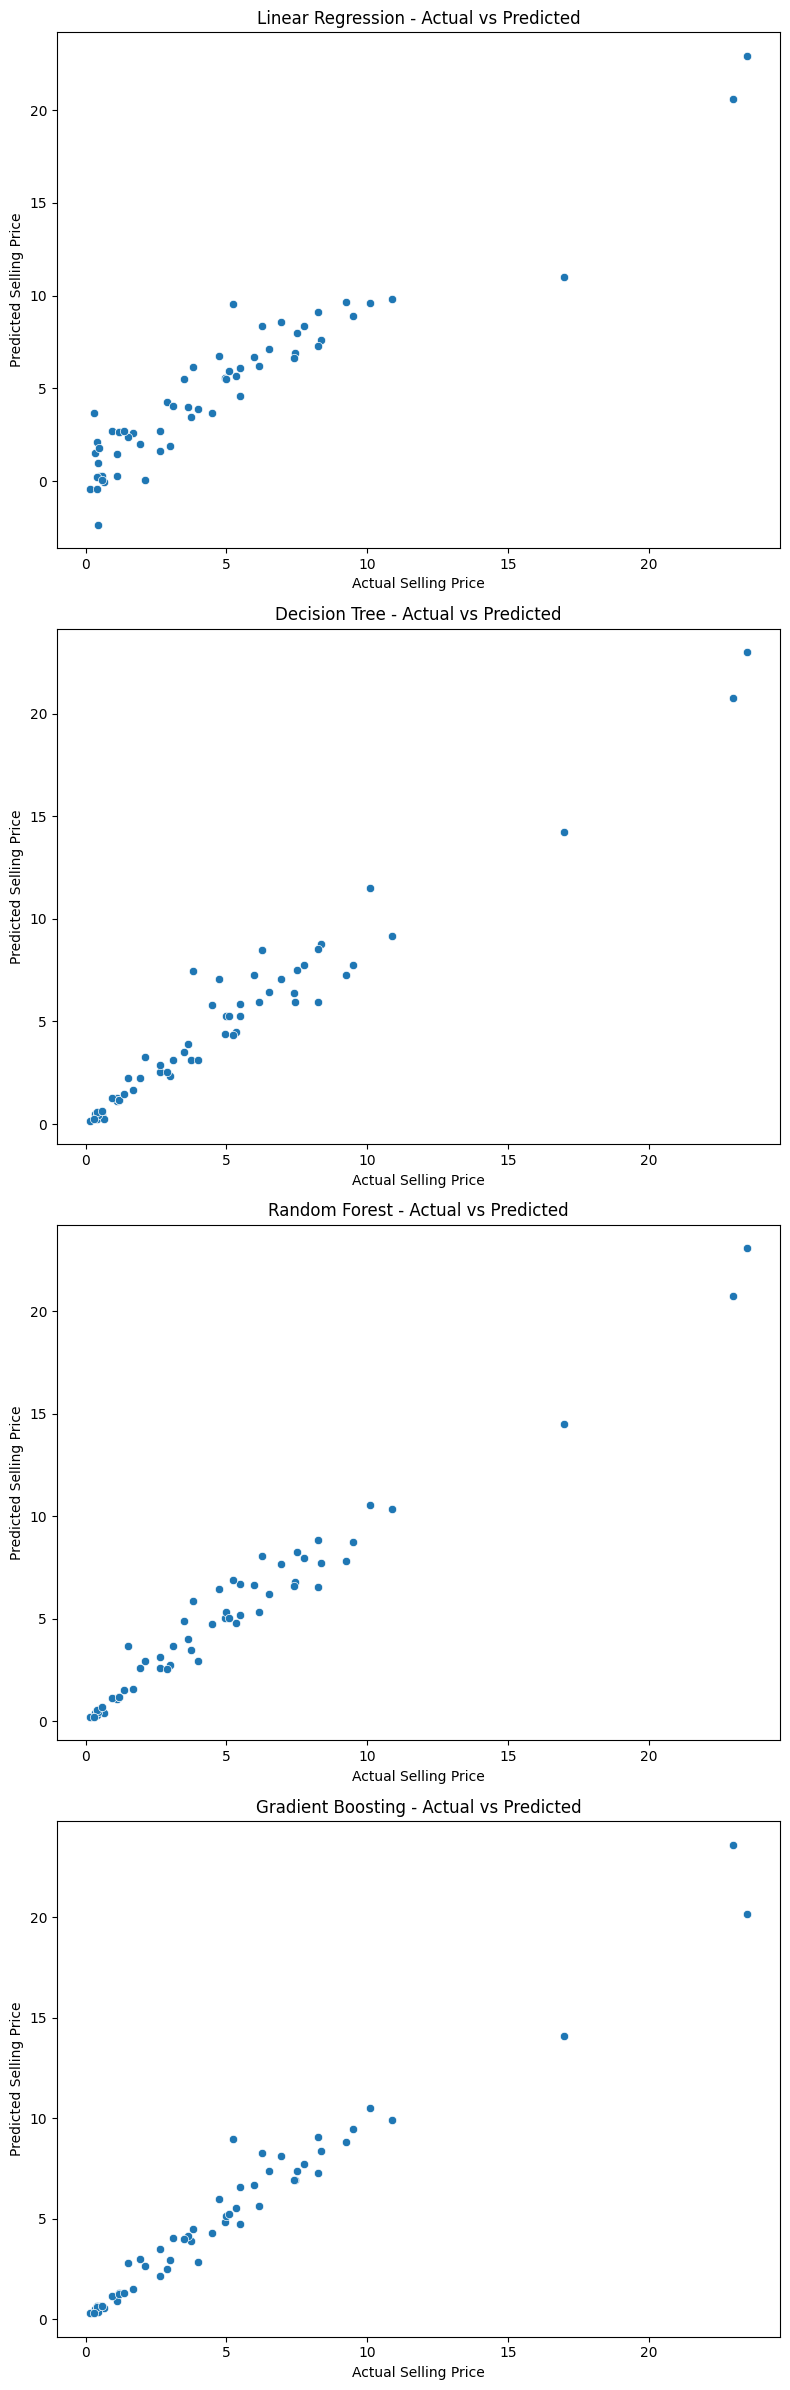

In [29]:
# Create subplots for model evaluation graphs
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(8, 6 * len(models)))

for (name, model), ax in zip(models, axes):
    # Create a pipeline with preprocessing and the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Create a scatter plot for actual vs predicted values
    sns.scatterplot(x=y_test, y=y_pred, ax=ax)
    ax.set_title(f'{name} - Actual vs Predicted')
    ax.set_xlabel('Actual Selling Price')
    ax.set_ylabel('Predicted Selling Price')

plt.tight_layout()
plt.show()

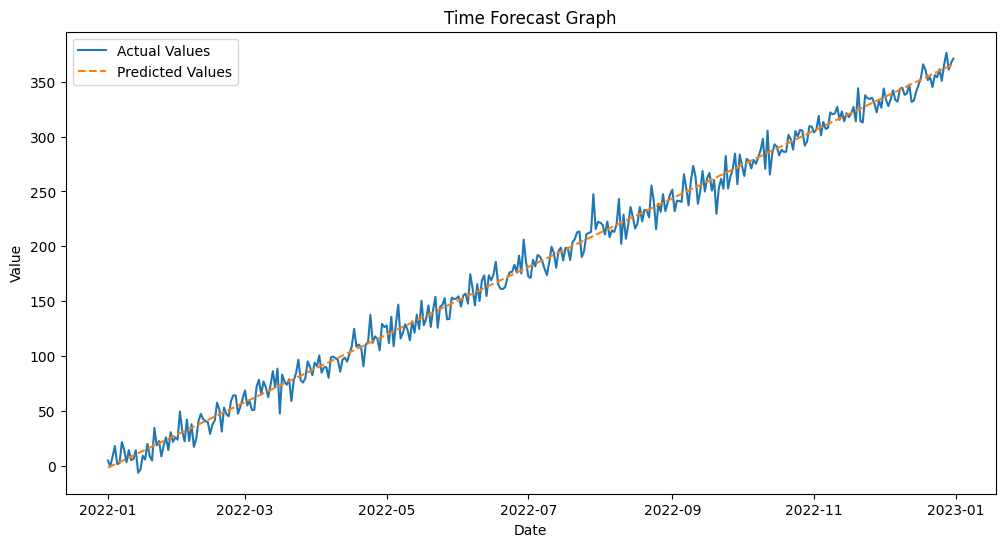

In [31]:
# Generate a simple time series dataset
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
time_series_data = pd.DataFrame(date_rng, columns=['date'])
time_series_data['value'] = np.arange(len(date_rng)) + np.random.normal(scale=10, size=len(date_rng))

# Split the data into features and target
X = time_series_data[['date']]
y = time_series_data['value']

# Convert the 'date' column to numeric for model training
X['date_numeric'] = X['date'].astype(int) // 10**9  # Convert to seconds

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train[['date_numeric']], y_train)

# Predict on the entire dataset
time_series_data['predicted_value'] = model.predict(X[['date_numeric']])

# Plot the time forecast graph
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['date'], time_series_data['value'], label='Actual Values')
plt.plot(time_series_data['date'], time_series_data['predicted_value'], label='Predicted Values', linestyle='--')
plt.title('Time Forecast Graph')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
